In [14]:
import scanpy as sc
import anndata as ad
import squidpy as sq

import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
%%time
rna_cna = pd.read_csv("../data/interim/FRP_copykat_CNA_results.txt", sep = "\t", index_col = 2)

CPU times: user 3min 38s, sys: 14.4 s, total: 3min 52s
Wall time: 3min 53s


In [29]:
chroms = rna_cna.chrom

In [30]:
rna_cna = rna_cna.drop(columns = ["chrom","chrompos"])


In [31]:
rna_cna.head()

,AAACAAGCAAACGGGA.1,AAACAAGCAAATAGGA.1,AAACAAGCAACAAGTT.1,AAACAAGCAACCATTC.1,AAACAAGCAACTAAAC.1,AAACAAGCAAGTCGCG.1,AAACAAGCAATACCCT.1,AAACAAGCAATGGGAG.1,AAACAAGCACAAGCGT.1,AAACAAGCACATTGTC.1,...,TTTGGCGGTTTACGAC.1,TTTGGCGGTTTGTGAC.1,TTTGTGAGTAAAGCAT.1,TTTGTGAGTACTTAGC.1,TTTGTGAGTCCGTGAC.1,TTTGTGAGTGATAAAC.1,TTTGTGAGTGGTTACT.1,TTTGTGAGTTACTTCT.1,TTTGTGAGTTGTCATA.1,TTTGTGAGTTTGGCCA.1
abspos,,,,,,,,,,,,,,,,,,,,,
1042457.0,-0.036124,-0.093622,0.098105,0.159482,0.113863,0.049553,0.024992,-0.055088,0.063074,0.073035,...,0.105740,-0.044175,-0.015850,0.061139,0.040408,0.084354,-0.110451,0.106061,0.054095,-0.051687
1265484.0,-0.036124,-0.093622,0.098105,0.159482,0.113863,0.049553,0.024992,-0.055088,0.063074,0.073035,...,0.105740,-0.044175,-0.015850,0.061139,0.040408,0.084354,-0.110451,0.106061,0.054095,-0.051687
1519859.0,-0.036124,-0.093622,0.098105,0.159482,0.113863,0.049553,0.024992,-0.055088,0.063074,0.073035,...,0.105740,-0.044175,-0.015850,0.061139,0.040408,0.084354,-0.110451,0.106061,0.054095,-0.051687
1826619.0,-0.036124,-0.093622,0.098105,0.159482,0.113863,0.049553,0.024992,-0.055088,0.063074,0.073035,...,0.105740,-0.044175,-0.015850,0.061139,0.040408,0.084354,-0.110451,0.106061,0.054095,-0.051687
2058465.0,0.008697,-0.135474,0.023012,-0.000307,-0.153787,-0.000637,0.000069,0.000235,-0.059653,0.000031,...,0.040347,-0.016430,-0.184834,-0.150781,0.043961,0.000039,-0.021113,-0.134849,0.024735,-0.044809


In [32]:
rna_cna = rna_cna.T

In [33]:
rna_cna.index = [x.replace(".","-") for x in rna_cna.index]

In [34]:
rna_clones = pd.read_csv("../data/interim/clones_sc.csv", index_col = 0)

In [35]:
rna_clones

,leiden
cell.names,
CGCAAGGGTTAGTGAG-1,8
CAAGACTAGCTTGAGG-1,8
GCCAATACATTGCCTG-1,8
CTTCAATAGATGATTG-1,8
GATGCAAGTATTGCGT-1,8
...,...
TCTAACCCAGGTATTG-1,0
TCAACTAGTTAGCGCC-1,3
CAGGTCAAGACCATTT-1,0


In [36]:
rna_cna_small = rna_cna.loc[rna_clones.index]

In [37]:
clones = rna_clones.leiden

In [38]:
cons_sc = []
sc_clone_size = {}
for cl in range(len(set(clones))):
    idx = np.where(clones == cl)[0]
    values = rna_cna_small.iloc[idx]
    values = values.median().values
    cons_sc.append(values)
    sc_clone_size[cl] = len(idx)
    

In [39]:
cons_sc = pd.DataFrame(cons_sc, columns = rna_cna_small.columns)

In [78]:
corr_map = cons_sc.T.corr(method = "kendall")

In [79]:
sns.set(font_scale=3)

In [80]:
corr_map

,0,1,2,3,4,5,6,7,8
0,1.000000,0.916624,0.884796,0.062143,0.429494,0.831035,0.829407,0.451606,0.741549
1,0.916624,1.000000,0.930998,0.067232,0.463585,0.860871,0.791731,0.485994,0.709124
2,0.884796,0.930998,1.000000,0.080781,0.467061,0.928120,0.827311,0.490094,0.725116
3,0.062143,0.067232,0.080781,1.000000,0.020083,0.066262,0.087395,0.021141,0.039075
4,0.429494,0.463585,0.467061,0.020083,1.000000,0.467778,0.425106,0.924224,0.415102
5,0.831035,0.860871,0.928120,0.066262,0.467778,1.000000,0.811289,0.498750,0.701063
6,0.829407,0.791731,0.827311,0.087395,0.425106,0.811289,1.000000,0.446546,0.728597
7,0.451606,0.485994,0.490094,0.021141,0.924224,0.498750,0.446546,1.000000,0.439395
8,0.741549,0.709124,0.725116,0.039075,0.415102,0.701063,0.728597,0.439395,1.000000


Text(694.4999999999999, 0.5, 'clones')

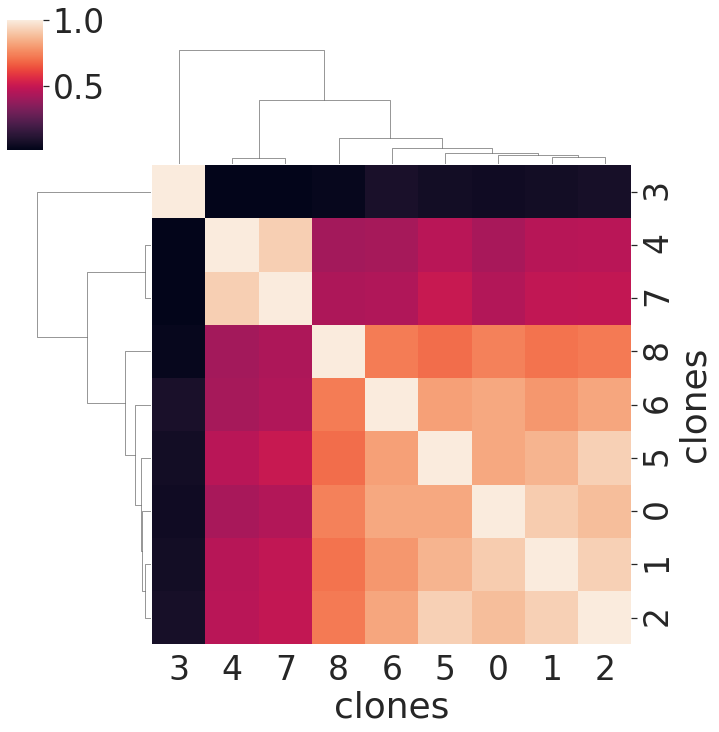

In [81]:
g = sns.clustermap(corr_map)
ax = g.ax_heatmap
ax.set_xlabel("clones")
ax.set_ylabel("clones")

In [2]:
import anndata as ad
import squidpy as sq

In [3]:
adata = sc.read_h5ad("../data/interim/visium_annotated.h5ad")

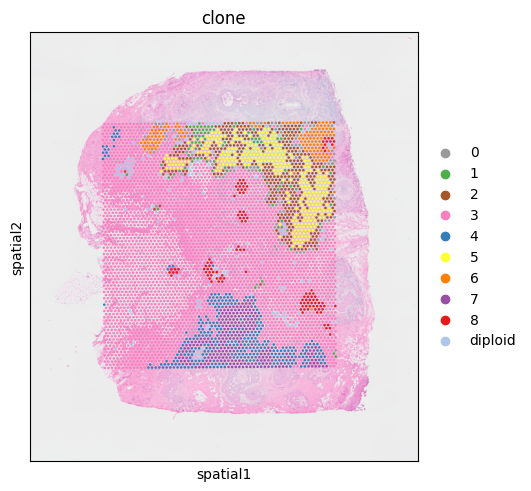

In [4]:
sq.pl.spatial_scatter(adata, color="clone")


In [21]:
adata = adata[adata.obs[adata.obs.clone != "diploid"].index]

In [22]:
sq.gr.spatial_neighbors(adata)


In [23]:
sq.gr.nhood_enrichment(adata, cluster_key="clone")


  0%|          | 0/1000 [00:00<?, ?/s]

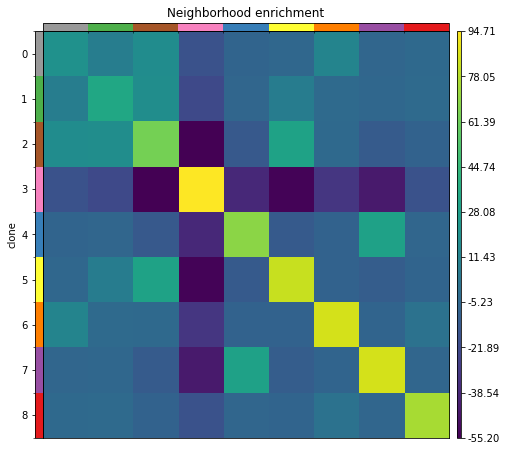

In [24]:
sq.pl.nhood_enrichment(adata, cluster_key="clone")


In [25]:
n_enr = adata.uns["clone_nhood_enrichment"]['zscore']

In [59]:
sns.set(font_scale=3)

Text(694.4999999999999, 0.5, 'clones')

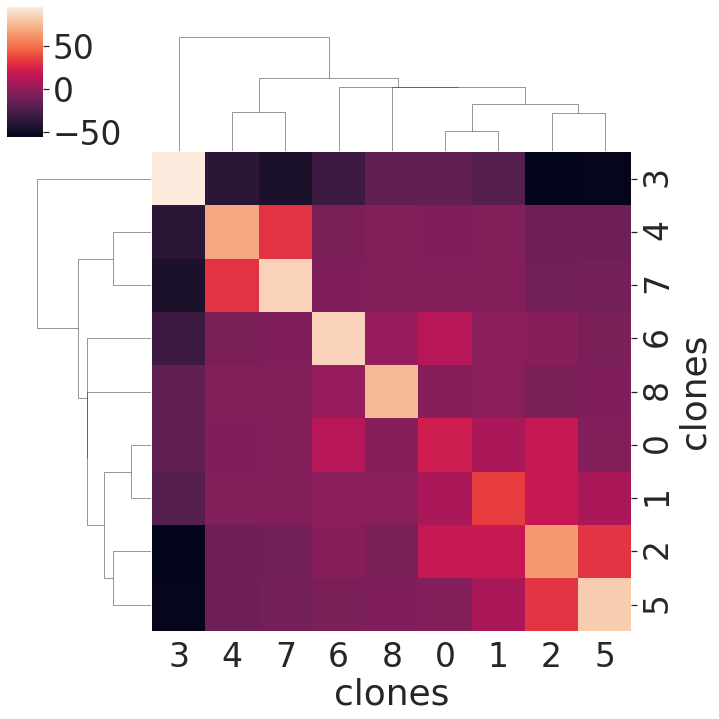

In [60]:
g = sns.clustermap(n_enr)
ax = g.ax_heatmap
ax.set_xlabel("clones")
ax.set_ylabel("clones")